# **Airline Passenger Satisfaction**

https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction

This dataset contains an airline passenger satisfaction survey. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
df = pd.read_csv("train.csv")
df.drop(columns="Unnamed: 0", inplace = True)

In [2]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.drop(['id'], axis=1, inplace=True)

## Correlation Heatmap

In [ ]:
x = df.iloc[:,6:20]

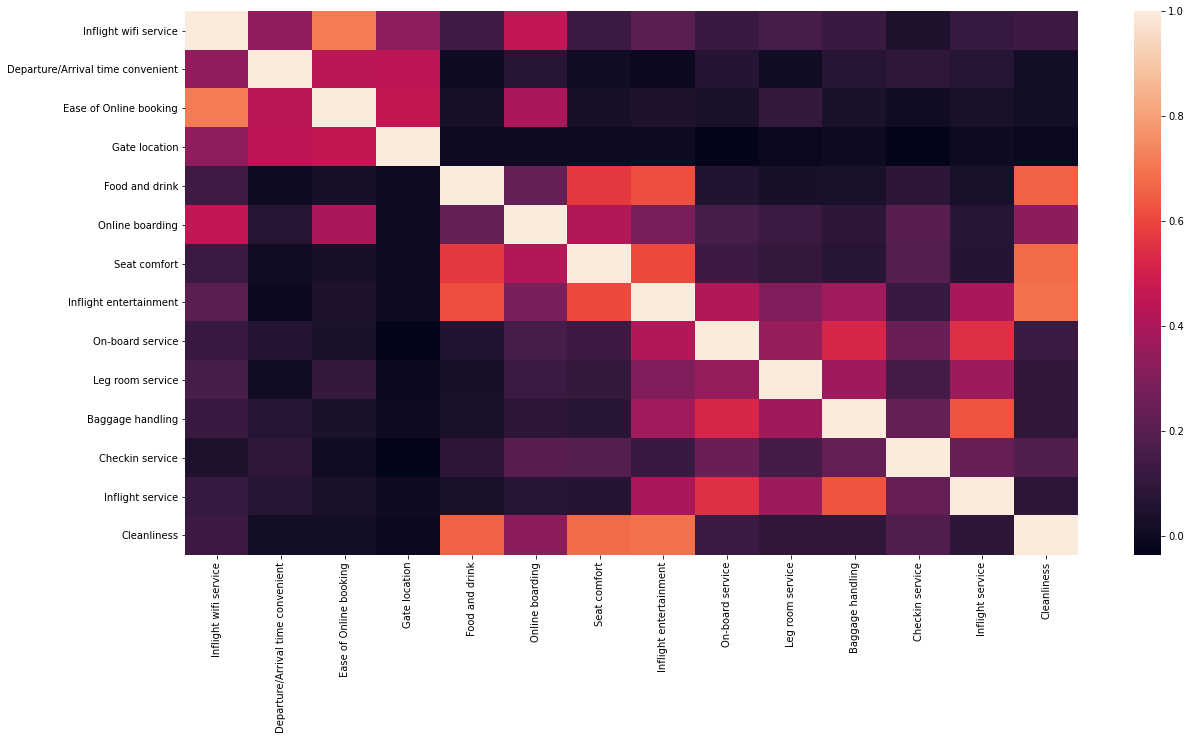

In [ ]:
plt.figure(figsize=(20,10))
c= x.corr()
sns.heatmap(c)

## Multicollinearity Test

In [ ]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(x)
chi_square_value, p_value

(601690.8930479775, 0.0)

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(x)
kmo_model

0.7812294257164448

In [ ]:
kmo_all

array([0.74185624, 0.75272769, 0.68172696, 0.70668581, 0.84090739,
       0.73645631, 0.83286042, 0.7679002 , 0.82882765, 0.889663  ,
       0.81478149, 0.70009914, 0.78427447, 0.81687116])

## Factor Analysis Procedure

In [4]:
!pip install factor_analyzer  
from factor_analyzer import FactorAnalyzer

     |████████████████████████████████| 40kB 4.1MB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-cp36-none-any.whl size=40380 sha256=635be5628e61e46237145671b4ed8cc973124528af3ef14eab35174476b03da4
  Stored in directory: /root/.cache/pip/wheels/4a/d0/57/f1330cb9c80e82d8d05391c74c94ed61ce3f03bf6157f3d6db
Successfully built factor-analyzer


Text(0.5, 0, 'Factor')

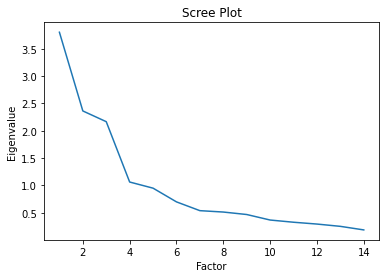

In [5]:
#Subset of the data, the 14 columns containing the survey answers
x =df[df.columns[6:20]] 
fa = FactorAnalyzer()
fa.fit(x, 10)
#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
ev
plt.plot(range(1,x.shape[1]+1),ev)
plt.title('Scree Plot')
plt.ylabel("Eigenvalue")
plt.xlabel("Factor")

In [6]:
fa = FactorAnalyzer(3, rotation='promax')
fa.fit(x)
loads = fa.loadings_
print(loads)

[[ 9.67118374e-02  5.55554340e-02  7.50116239e-01]
 [-8.10822809e-02  3.71621992e-02  5.09248682e-01]
 [-4.45794834e-02 -4.22310140e-02  9.46035874e-01]
 [-6.96576789e-02 -5.92260945e-02  5.18053315e-01]
 [ 7.96637701e-01 -1.32933119e-01 -5.62497853e-02]
 [ 3.71677175e-01  2.18344376e-02  3.26030565e-01]
 [ 8.22209549e-01 -6.70143892e-02 -4.22433099e-02]
 [ 7.08443155e-01  3.48884002e-01 -7.81495718e-02]
 [-2.62188788e-02  7.19897460e-01 -2.19309833e-02]
 [-1.21465120e-02  4.88589915e-01  4.59616249e-02]
 [-1.12088007e-01  8.00551419e-01 -2.14535955e-02]
 [ 9.99985101e-02  2.70513607e-01 -1.17581207e-04]
 [-1.23184401e-01  8.39111711e-01 -3.28141741e-02]
 [ 8.95947165e-01 -7.12461682e-02 -7.77793777e-02]]


In [7]:
a,b,c = fa.get_factor_variance()
a = np.expand_dims(a, axis=0)
b = np.expand_dims(b, axis=0)
c = np.expand_dims(c, axis=0)
arr_var = np.concatenate((a, b, c), axis=0)
d = np.array([[np.nan, np.nan, np.nan]])
arr_var = np.concatenate((arr_var, d.T), axis=1)

communality = fa.get_communalities()
communality = np.expand_dims(communality, axis=0)
arr_load = np.concatenate((loads, communality.T), axis=1)

arr_load = np.concatenate((arr_load, arr_var), axis=0)

arr_load

array([[ 9.67118374e-02,  5.55554340e-02,  7.50116239e-01,
         5.75113958e-01],
       [-8.10822809e-02,  3.71621992e-02,  5.09248682e-01,
         2.67289586e-01],
       [-4.45794834e-02, -4.22310140e-02,  9.46035874e-01,
         8.98754664e-01],
       [-6.96576789e-02, -5.92260945e-02,  5.18053315e-01,
         2.76739160e-01],
       [ 7.96637701e-01, -1.32933119e-01, -5.62497853e-02,
         6.55466879e-01],
       [ 3.71677175e-01,  2.18344376e-02,  3.26030565e-01,
         2.44916594e-01],
       [ 8.22209549e-01, -6.70143892e-02, -4.22433099e-02,
         6.82303968e-01],
       [ 7.08443155e-01,  3.48884002e-01, -7.81495718e-02,
         6.29719106e-01],
       [-2.62188788e-02,  7.19897460e-01, -2.19309833e-02,
         5.19420750e-01],
       [-1.21465120e-02,  4.88589915e-01,  4.59616249e-02,
         2.40980113e-01],
       [-1.12088007e-01,  8.00551419e-01, -2.14535955e-02,
         6.53906552e-01],
       [ 9.99985101e-02,  2.70513607e-01, -1.17581207e-04,
      

In [10]:
x.columns

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [12]:
df_load = pd.DataFrame(data=arr_load, index=['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'SS_Loading', 'Proportional_Variance', 'Cumulative_Variance'], columns=["Factor_1", "Factor_2","Factor_3","Total_Communalities"])

In [13]:
df_load

,Factor_1,Factor_2,Factor_3,Total_Communalities
Inflight wifi service,0.096712,0.055555,0.750116,0.575114
Departure/Arrival time convenient,-0.081082,0.037162,0.509249,0.267290
Ease of Online booking,-0.044579,-0.042231,0.946036,0.898755
Gate location,-0.069658,-0.059226,0.518053,0.276739
Food and drink,0.796638,-0.132933,-0.056250,0.655467
Online boarding,0.371677,0.021834,0.326031,0.244917
Seat comfort,0.822210,-0.067014,-0.042243,0.682304
Inflight entertainment,0.708443,0.348884,-0.078150,0.629719
On-board service,-0.026219,0.719897,-0.021931,0.519421
Leg room service,-0.012147,0.488590,0.045962,0.240980


In [14]:
x.columns

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
fa = FactorAnalyzer(3, rotation='promax')
fa.fit(x)
loads = fa.loadings_
print(loads)

[[ 1.16613511e-01  7.15413674e-01  6.07975830e-02]
 [-4.50422739e-02  5.43997707e-01  3.55528410e-02]
 [-1.17418666e-02  8.98069765e-01 -3.51077465e-02]
 [-2.91804640e-02  5.62046736e-01 -5.57106151e-02]
 [ 7.92071771e-01  7.42515127e-03 -1.13955980e-01]
 [ 7.74134540e-01  2.62252612e-04 -5.33663899e-02]
 [ 7.47416925e-01 -6.81478027e-03  3.64857236e-01]
 [ 2.22848610e-02 -1.90147895e-03  6.86403988e-01]
 [-5.06867275e-02  4.90014226e-03  7.72885431e-01]
 [-6.24942168e-02 -5.05988681e-03  8.26092471e-01]
 [ 8.76884097e-01 -1.21209349e-02 -5.93523210e-02]]


In [17]:
a,b,c = fa.get_factor_variance()
a = np.expand_dims(a, axis=0)
b = np.expand_dims(b, axis=0)
c = np.expand_dims(c, axis=0)
arr_var = np.concatenate((a, b, c), axis=0)
d = np.array([[np.nan, np.nan, np.nan]])
arr_var = np.concatenate((arr_var, d.T), axis=1)

communality = fa.get_communalities()
communality = np.expand_dims(communality, axis=0)
arr_load = np.concatenate((loads, communality.T), axis=1)

arr_load = np.concatenate((arr_load, arr_var), axis=0)

arr_load

array([[ 1.16613511e-01,  7.15413674e-01,  6.07975830e-02,
         5.29111782e-01],
       [-4.50422739e-02,  5.43997707e-01,  3.55528410e-02,
         2.99226316e-01],
       [-1.17418666e-02,  8.98069765e-01, -3.51077465e-02,
         8.07899728e-01],
       [-2.91804640e-02,  5.62046736e-01, -5.57106151e-02,
         3.19851706e-01],
       [ 7.92071771e-01,  7.42515127e-03, -1.13955980e-01,
         6.40418789e-01],
       [ 7.74134540e-01,  2.62252612e-04, -5.33663899e-02,
         6.02132327e-01],
       [ 7.47416925e-01, -6.81478027e-03,  3.64857236e-01,
         6.91799304e-01],
       [ 2.22848610e-02, -1.90147895e-03,  6.86403988e-01,
         4.71650666e-01],
       [-5.06867275e-02,  4.90014226e-03,  7.72885431e-01,
         5.99945046e-01],
       [-6.24942168e-02, -5.05988681e-03,  8.26092471e-01,
         6.86359901e-01],
       [ 8.76884097e-01, -1.21209349e-02, -5.93523210e-02,
         7.72595335e-01],
       [ 2.57780793e+00,  1.93047786e+00,  1.91270511e+00,
      

In [19]:
x.columns

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Baggage handling', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [20]:
df_load = pd.DataFrame(data=arr_load, index=['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Baggage handling', 'Inflight service', 'Cleanliness', 'SS_Loading', 'Proportional_Variance', 'Cumulative_Variance'], columns=["Factor_1", "Factor_2","Factor_3","Total_Communalities"])

In [21]:
df_load

,Factor_1,Factor_2,Factor_3,Total_Communalities
Inflight wifi service,0.116614,0.715414,0.060798,0.529112
Departure/Arrival time convenient,-0.045042,0.543998,0.035553,0.299226
Ease of Online booking,-0.011742,0.898070,-0.035108,0.807900
Gate location,-0.029180,0.562047,-0.055711,0.319852
Food and drink,0.792072,0.007425,-0.113956,0.640419
Seat comfort,0.774135,0.000262,-0.053366,0.602132
Inflight entertainment,0.747417,-0.006815,0.364857,0.691799
On-board service,0.022285,-0.001901,0.686404,0.471651
Baggage handling,-0.050687,0.004900,0.772885,0.599945
Inflight service,-0.062494,-0.005060,0.826092,0.686360


In [22]:
df_load.to_csv("df_load.csv")

## Reliability

In [ ]:
!pip install pingouin
import pingouin as pg

In [ ]:
#Create the factors
factor1 = df[['Food and drink', 'Seat comfort', 'Inflight entertainment', 'Cleanliness']]
factor2 = df[['On-board service', 'Baggage handling', 'Inflight service']]
factor3 = df[['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location']]
#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print(factor1_alpha, factor2_alpha, factor3_alpha)

(0.8762877916624099, array([0.875, 0.878])) (0.7942916933090214, array([0.792, 0.796])) (0.7679754211110683, array([0.766, 0.77 ]))


In [ ]:
new_variables = fa.fit_transform(x)

In [ ]:
new_variables

array([[ 1.26861201,  0.62004252,  0.07988161],
       [-1.88096531, -0.45419491,  0.12529103],
       [ 1.41595807,  0.34012271, -0.71489467],
       ...,
       [ 0.57998991,  0.35088142, -1.21598843],
       [-1.92869116, -0.28474733, -1.06702266],
       [-1.90731764, -0.71957063,  0.01083049]])